In [6]:
# Multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.font_manager as font_manager

In [8]:
mapa = gpd.read_file('mapa_base.json', driver='JSON', crs={'init': 'epsg:4326'})
idh = pd.read_csv('idh_2011a2015.csv')

mapa.head()
idh.head()

,UF,ESTADO,REGIAO,AREA_KM2,AREAURB_KM2,geometry
0,AC,Acre,NO,164123.040,49.5,"POLYGON ((-68.61895 -11.129709, -68.685345 -11..."
1,AL,Alagoas,NE,27778.506,202.1,"POLYGON ((-36.431494 -10.448229, -36.473394 -1..."
2,AP,b'Amap\xe1',NO,142828.521,69.3,"(POLYGON ((-51.909319 -1.165791, -51.965264 -1..."
3,AM,Amazonas,NO,1559159.148,395.1,"POLYGON ((-63.47887 2.198446, -63.439548 2.092..."
4,BA,Bahia,NE,564733.177,762.9,"(POLYGON ((-45.959232 -14.897264, -45.935374 -..."


,ANO,NOME_AGREGA,AGREGA,ESPVIDA,MORT1,T_ENV,RAZDEP,ANOSEST,T_ANALF15M,T_ANALF18M,...,POP25M,POP65M,POPT,POPTOT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM_E,IDHM_L,IDHM_R,IDHM
0,2011,RO,11,70.32,22.24,5.29,45.77,7.60,9.74,10.66,...,932158,89420,1573035,1587902,0.557,0.637,0.609,0.755,0.697,0.687
1,2012,RO,11,70.53,21.75,4.99,44.60,7.94,8.57,9.26,...,945728,85458,1633695,1649946,0.558,0.672,0.632,0.759,0.703,0.698
2,2013,RO,11,70.74,21.27,5.60,43.78,7.80,8.56,9.24,...,987618,97140,1644167,1670217,0.544,0.675,0.628,0.762,0.699,0.696
3,2014,RO,11,70.94,20.82,5.76,45.20,8.31,8.34,8.88,...,1004055,101017,1641072,1657696,0.585,0.713,0.667,0.766,0.711,0.715
4,2015,RO,11,71.14,20.38,7.13,45.02,8.35,8.01,8.65,...,1041828,126433,1747811,1755648,0.573,0.697,0.653,0.769,0.703,0.708


In [12]:
idh_2011 = idh[idh['ANO']==2011].copy()
idh_2012 = idh[idh['ANO']==2012].copy()
idh_2013 = idh[idh['ANO']==2013].copy()
idh_2014 = idh[idh['ANO']==2014].copy()
idh_2015 = idh[idh['ANO']==2015].copy()

In [9]:
#Fonte: Ministério da Saúde ---- http://dados.gov.br/dataset/ubs_funcionamento ---- dados de 2015
ubs = pd.read_csv('ubs_funcionamento.csv')
ubs.head()

,gid,co_cnes,lat,long,no_fantasia,no_logradouro,nu_endereco,no_bairro,nu_telefone,co_cep,uf,cidade,ano_ubs_det,mes_ubs_det
0,302,2203235,-15.474662,-42.310238,UBS AGENOR JOSE DE MIRANDA,RUA SENADORA IARA,S/N,ZONA RURAL,NaN,39536000.0,MG,Indaiabira,2016,5
1,27,2105462,-15.342934,-43.670329,UAPS NOVA ESPERANCA,AV JOAO TEIXEIRA FILHO,566,CENTRO,(38)38331252,39508000.0,MG,Jaíba,2016,5
2,331,2576368,-23.598461,-51.632051,UBS LAZARO DE PAULA RODRIGUES,RUA MARUMBI,S/N,CENTRO,(43)34327398,86900000.0,PR,Jandaia do Sul,2016,5
3,273,2478234,-3.499682,-40.277123,CENTRO DE SAUDE DA FAMILIA DO MIRIM ANTONIO BI...,ALTO ALEGRE,S/N,ALTO ALEGRE,8836431065,62140000.0,CE,Massapê,2016,5
4,46,2412802,-13.277739,-41.385155,US DA FAMILIA DE IRACEMA COSTA E SILVA,TRAVESSA ITAMAR MAGALHAES,25,CENTRO,77 34135203,46760000.0,BA,Ibicoara,2016,5


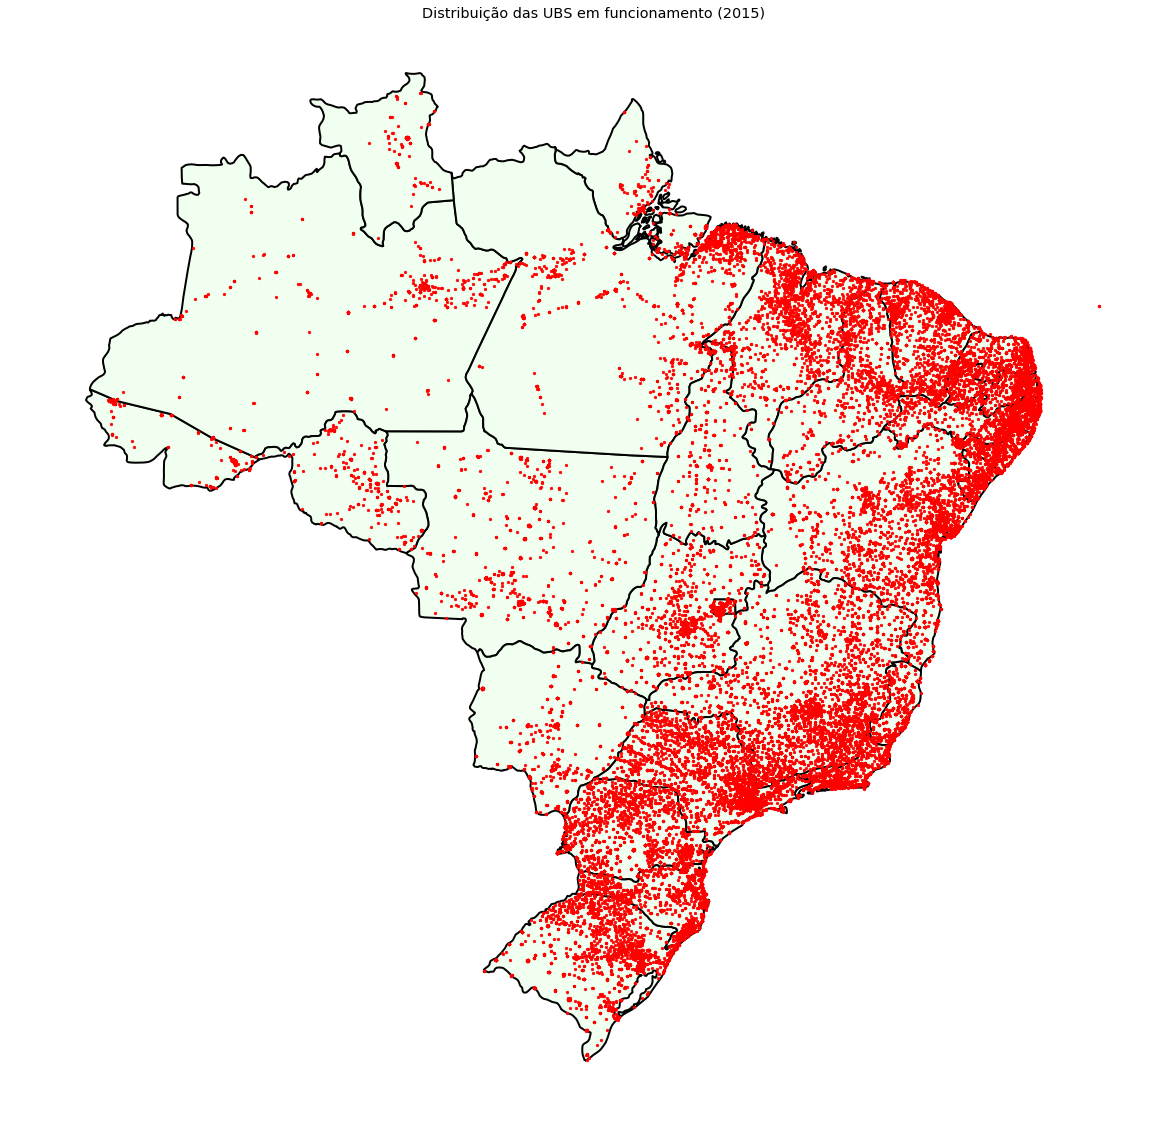

In [10]:
from shapely.geometry import Point

coords = pd.DataFrame({'coords': list(zip(np.array(ubs['long']), np.array(ubs['lat'])))})
coords['geometry'] = coords['coords'].apply(Point)

ubs_coords = gpd.GeoDataFrame(coords, geometry='geometry', crs={'init': 'epsg:4326'})

fig, ax = plt.subplots(figsize=(20, 20))
_ = mapa.plot(color='honeydew', edgecolor='black', linewidth=2, ax=ax)
_ = ubs_coords.plot(marker='.', markersize=30, color='red', ax=ax)
_ = ax.axis('off')
_ = plt.title('Distribuição das UBS em funcionamento (2015)')

In [16]:
idh_2012[['POPTOT', 'NOME_AGREGA']]

,POPTOT,NOME_AGREGA
1,1649946,RO
6,740711,AC
11,3593396,AM
16,463062,RR
21,7525207,PA
26,720206,AP
31,1437166,TO
36,6569240,MA
41,3160546,PI
46,8443920,CE
